# Machine Learning Modeling Notebook

## Objectives
- Build machine learning models to predict house prices
- Compare different models to find the best one
- Tune parameters to improve performance
- Save the best model for deployment

## Inputs
- Prepared data from outputs/datasets/prepared/v1/prepared_data.csv

## Outputs
- Trained ML model saved as pickle file
- Model performance metrics
- Feature importance analysis

In [1]:
# Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

# For saving models
import pickle
import os

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
# Load the prepared data
df = pd.read_csv('../outputs/datasets/prepared/v1/prepared_data.csv')

print(f"Loaded {len(df)} properties")
print(f"Columns: {df.columns.tolist()}")

Loaded 17553 properties
Columns: ['Transaction unique identifier', 'Price', 'Date of Transfer', 'Property Type', 'Old/New', 'Duration', 'Town/City', 'District', 'County', 'PPDCategory Type', 'Record Status - monthly file only', 'Property_Type_Encoded', 'County_Encoded', 'Old_New_Encoded', 'Duration_Encoded', 'Type_Age_Interaction', 'County_Price_Tier', 'Type_Rarity']


In [3]:
df.head()

,Transaction unique identifier,Price,Date of Transfer,Property Type,Old/New,Duration,Town/City,District,County,PPDCategory Type,Record Status - monthly file only,Property_Type_Encoded,County_Encoded,Old_New_Encoded,Duration_Encoded,Type_Age_Interaction,County_Price_Tier,Type_Rarity
0,{6146E264-E0D9-4C53-ACC8-48DB3954F80B},95200,2007-11-23 00:00,F,Y,L,SWINDON,SWINDON,SWINDON,A,A,1,104,1,1,1,0,0.18128
1,{26EBD75A-D90F-411C-85E5-4D56F0F66484},199950,2013-06-28 00:00,S,Y,F,BINGLEY,BRADFORD,WEST YORKSHIRE,A,A,3,117,1,0,3,0,0.27699
2,{E700C723-9426-4924-8D3F-1730EC3B2BCC},132000,2001-06-26 00:00,S,N,F,BRIGHTON,BRIGHTON AND HOVE,BRIGHTON AND HOVE,A,A,3,11,0,0,0,0,0.27699
3,{677E0E46-8E8F-4560-AD93-07F72D5AE6D5},60000,1997-10-31 00:00,S,N,F,CAERPHILLY,CAERPHILLY,CAERPHILLY,A,A,3,13,0,0,0,0,0.27699
4,{E2387F76-24EC-4A7E-8A27-220E500F0DC2},87000,1998-02-23 00:00,S,N,F,BEXLEYHEATH,BEXLEY,GREATER LONDON,A,A,3,46,0,0,0,1,0.27699


In [4]:
# Step 1: Define features and target
print("Step 1: Setting up features and target...")

# Features we'll use for prediction
features = [
    'Property_Type_Encoded', 'County_Encoded', 'Old_New_Encoded',
    'Duration_Encoded', 'Type_Age_Interaction', 'County_Price_Tier',
    'Type_Rarity'
]

# What we're trying to predict
target = 'Price'

X = df[features]
y = df[target]

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

Step 1: Setting up features and target...
Features shape: (17553, 7)
Target shape: (17553,)


In [8]:
# Step 2: Split data into training and testing sets
print("Step 2: Splitting data...")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set: {len(X_train)} properties")
print(f"Test set: {len(X_test)} properties")
print(f"Split ratio: 80/20")

Step 2: Splitting data...
Training set: 14042 properties
Test set: 3511 properties
Split ratio: 80/20


In [9]:
print("Training Linear Regression...")

# Create and train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
lr_train_pred = lr_model.predict(X_train)
lr_test_pred = lr_model.predict(X_test)

# Calculate scores
lr_train_r2 = r2_score(y_train, lr_train_pred)
lr_test_r2 = r2_score(y_test, lr_test_pred)
lr_test_mae = mean_absolute_error(y_test, lr_test_pred)

print(f"Linear Regression Results:")
print(f"  Train R²: {lr_train_r2:.3f}")
print(f"  Test R²: {lr_test_r2:.3f}")
print(f"  Test MAE: £{lr_test_mae:,.0f}")

Training Linear Regression...
Linear Regression Results:
  Train R²: 0.174
  Test R²: 0.177
  Test MAE: £81,959


In [10]:
print("Training Decision Tree...")

# Create and train the model
dt_model = DecisionTreeRegressor(max_depth=10, random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
dt_train_pred = dt_model.predict(X_train)
dt_test_pred = dt_model.predict(X_test)

# Calculate scores
dt_train_r2 = r2_score(y_train, dt_train_pred)
dt_test_r2 = r2_score(y_test, dt_test_pred)
dt_test_mae = mean_absolute_error(y_test, dt_test_pred)

print(f"Decision Tree Results:")
print(f"  Train R²: {dt_train_r2:.3f}")
print(f"  Test R²: {dt_test_r2:.3f}")
print(f"  Test MAE: £{dt_test_mae:,.0f}")

Training Decision Tree...
Decision Tree Results:
  Train R²: 0.259
  Test R²: 0.213
  Test MAE: £79,635


In [11]:
print("Training K-Nearest Neighbors...")

# Create and train the model
knn_model = KNeighborsRegressor(n_neighbors=10)
knn_model.fit(X_train, y_train)

# Make predictions
knn_train_pred = knn_model.predict(X_train)
knn_test_pred = knn_model.predict(X_test)

# Calculate scores
knn_train_r2 = r2_score(y_train, knn_train_pred)
knn_test_r2 = r2_score(y_test, knn_test_pred)
knn_test_mae = mean_absolute_error(y_test, knn_test_pred)

print(f"K-Nearest Neighbors Results:")
print(f"  Train R²: {knn_train_r2:.3f}")
print(f"  Test R²: {knn_test_r2:.3f}")
print(f"  Test MAE: £{knn_test_mae:,.0f}")

Training K-Nearest Neighbors...
K-Nearest Neighbors Results:
  Train R²: 0.202
  Test R²: 0.164
  Test MAE: £82,559


In [12]:
print("Training Random Forest...")

# Create and train the model
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    random_state=42
)
rf_model.fit(X_train, y_train)

# Make predictions
rf_train_pred = rf_model.predict(X_train)
rf_test_pred = rf_model.predict(X_test)

# Calculate scores
rf_train_r2 = r2_score(y_train, rf_train_pred)
rf_test_r2 = r2_score(y_test, rf_test_pred)
rf_test_mae = mean_absolute_error(y_test, rf_test_pred)

print(f"Random Forest Results:")
print(f"  Train R²: {rf_train_r2:.3f}")
print(f"  Test R²: {rf_test_r2:.3f}")
print(f"  Test MAE: £{rf_test_mae:,.0f}")

Training Random Forest...
Random Forest Results:
  Train R²: 0.271
  Test R²: 0.224
  Test MAE: £78,747


In [13]:
print("Tuning Random Forest parameters...")
print("This will take a few minutes...")

# Define parameters to test
param_grid = {
    'n_estimators': [50, 100, 150],        # Number of trees
    'max_depth': [5, 10, 15],              # How deep trees can grow
    'min_samples_split': [2, 5, 10],       # Min samples to split a node
    'min_samples_leaf': [1, 2, 4],         # Min samples in leaf node
    'max_features': ['sqrt', 'log2', None], # Features to consider when splitting
    'bootstrap': [True, False]              # Whether to use bootstrap samples
}

# Note: This gives us 6 hyperparameters with 3 values each (for distinction criteria)
print(f"Testing {len(param_grid)} hyperparameters with 3 values each")
print(f"Total combinations to test: {3**6} = 729 combinations")

Tuning Random Forest parameters...
This will take a few minutes...
Testing 6 hyperparameters with 3 values each
Total combinations to test: 729 = 729 combinations


In [14]:
# Use GridSearchCV to find best parameters
# We'll use a smaller cv=3 to save time
grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=3,  # 3-fold cross validation
    scoring='r2',
    n_jobs=-1,  # Use all CPU cores
    verbose=1
)

# Fit the grid search
grid_search.fit(X_train, y_train)

print("\nBest parameters found:")
for param, value in grid_search.best_params_.items():
    print(f"  {param}: {value}")
    
print(f"\nBest cross-validation score: {grid_search.best_score_:.3f}")

Fitting 3 folds for each of 486 candidates, totalling 1458 fits

Best parameters found:
  bootstrap: True
  max_depth: 15
  max_features: sqrt
  min_samples_leaf: 4
  min_samples_split: 10
  n_estimators: 150

Best cross-validation score: 0.229


In [15]:
# Train final model with best parameters
print("Training final model with best parameters...")

best_rf_model = grid_search.best_estimator_

# Make predictions with best model
best_train_pred = best_rf_model.predict(X_train)
best_test_pred = best_rf_model.predict(X_test)

# Calculate scores
best_train_r2 = r2_score(y_train, best_train_pred)
best_test_r2 = r2_score(y_test, best_test_pred)
best_test_mae = mean_absolute_error(y_test, best_test_pred)

print(f"\nOptimized Random Forest Results:")
print(f"  Train R²: {best_train_r2:.3f}")
print(f"  Test R²: {best_test_r2:.3f}")
print(f"  Test MAE: £{best_test_mae:,.0f}")

Training final model with best parameters...

Optimized Random Forest Results:
  Train R²: 0.271
  Test R²: 0.223
  Test MAE: £78,521


In [16]:
# Test model stability with cross-validation
print("Testing model stability with 5-fold cross-validation...")

cv_scores = cross_val_score(
    best_rf_model, X_train, y_train,
    cv=5, scoring='r2'
)

print(f"Cross-validation R² scores: {cv_scores}")
print(f"Mean CV R²: {cv_scores.mean():.3f}")
print(f"Standard deviation: {cv_scores.std():.3f}")

if cv_scores.std() < 0.05:
    print("✓ Model is stable (low variance between folds)")
else:
    print("⚠ Model shows some variance between folds")

Testing model stability with 5-fold cross-validation...
Cross-validation R² scores: [0.21971632 0.21484248 0.24955162 0.24754473 0.21660991]
Mean CV R²: 0.230
Standard deviation: 0.016
✓ Model is stable (low variance between folds)


In [17]:
# Create comparison table
model_comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'K-Nearest Neighbors', 
              'Random Forest (Basic)', 'Random Forest (Optimized)'],
    'Train R²': [lr_train_r2, dt_train_r2, knn_train_r2, rf_train_r2, best_train_r2],
    'Test R²': [lr_test_r2, dt_test_r2, knn_test_r2, rf_test_r2, best_test_r2],
    'Test MAE': [lr_test_mae, dt_test_mae, knn_test_mae, rf_test_mae, best_test_mae]
})

# Sort by test R²
model_comparison = model_comparison.sort_values('Test R²', ascending=False)

print("\nModel Comparison:")
print(model_comparison.to_string(index=False))

best_model_name = model_comparison.iloc[0]['Model']
print(f"\n🏆 Best model: {best_model_name}")


Model Comparison:
                    Model  Train R²  Test R²     Test MAE
    Random Forest (Basic)  0.270967 0.223863 78746.750571
Random Forest (Optimized)  0.270908 0.223311 78521.102861
            Decision Tree  0.259015 0.213199 79634.929752
        Linear Regression  0.173873 0.176893 81958.501765
      K-Nearest Neighbors  0.202257 0.163744 82559.258530

🏆 Best model: Random Forest (Basic)


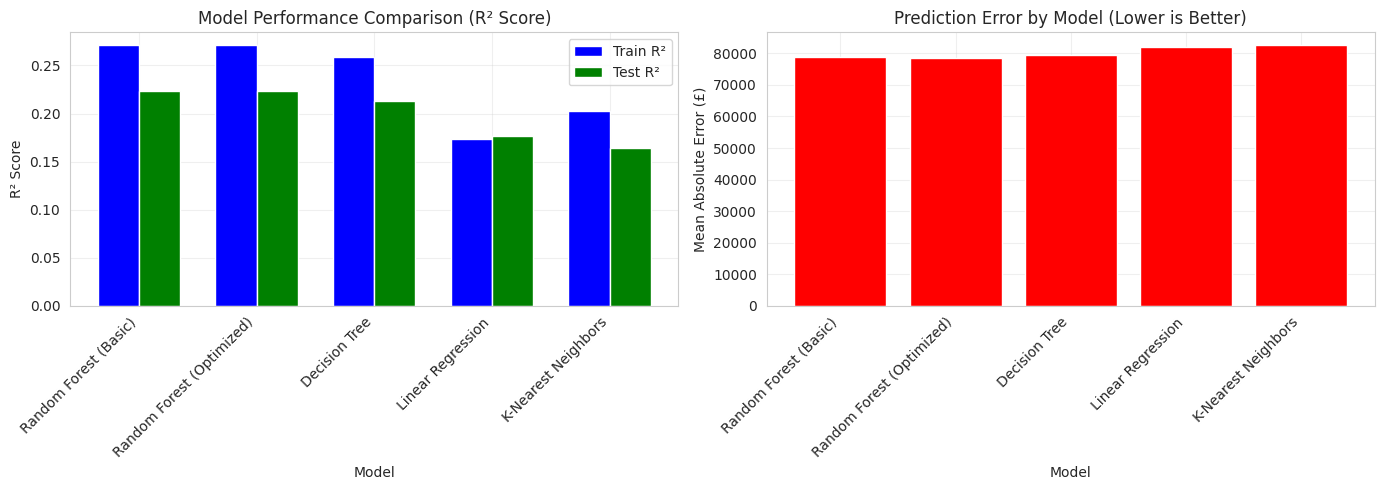

In [18]:
# Visualize model comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# R² comparison
x = np.arange(len(model_comparison))
width = 0.35

ax1.bar(x - width/2, model_comparison['Train R²'], width, label='Train R²', color='blue')
ax1.bar(x + width/2, model_comparison['Test R²'], width, label='Test R²', color='green')
ax1.set_xlabel('Model')
ax1.set_ylabel('R² Score')
ax1.set_title('Model Performance Comparison (R² Score)')
ax1.set_xticks(x)
ax1.set_xticklabels(model_comparison['Model'], rotation=45, ha='right')
ax1.legend()
ax1.grid(True, alpha=0.3)

# MAE comparison
ax2.bar(x, model_comparison['Test MAE'], color='red')
ax2.set_xlabel('Model')
ax2.set_ylabel('Mean Absolute Error (£)')
ax2.set_title('Prediction Error by Model (Lower is Better)')
ax2.set_xticks(x)
ax2.set_xticklabels(model_comparison['Model'], rotation=45, ha='right')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [19]:
# Get feature importance from best model
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': best_rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("Feature Importance:")
for idx, row in feature_importance.iterrows():
    print(f"{row['Feature']}: {row['Importance']:.4f}")

Feature Importance:
County_Encoded: 0.3460
County_Price_Tier: 0.3167
Property_Type_Encoded: 0.1782
Type_Rarity: 0.1035
Duration_Encoded: 0.0303
Old_New_Encoded: 0.0198
Type_Age_Interaction: 0.0055
